In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import os,sys
#from IPython.core.display import display, Latex, Math
# display(HTML("<style>.container { width:100% !important; }</style>"))
import ROOT

Welcome to JupyROOT 6.18/00


In [2]:
#Stuff I will use for all the Histograms
#########################################
sample_name="#scale[0.6]{MicroBooNE In-Progress}";
pot_char="#scale[0.6]{Runs 1+2+3 Accumulated POT: 6.79e+20}"
pot_num = 6.79E+20
t = ROOT.TLatex()
ROOT.gStyle.SetPaintTextFormat("4.2f")
ROOT.gStyle.SetHistMinimumZero(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetHistMinimumZero(ROOT.kFALSE)
t.SetNDC();
t.SetTextAlign(22);

Value of N_targets assuming 10cm FV border: 1.067769E+30 N Targets
Neutrino Flux Estimate: 4.996986E+11 v cm^2


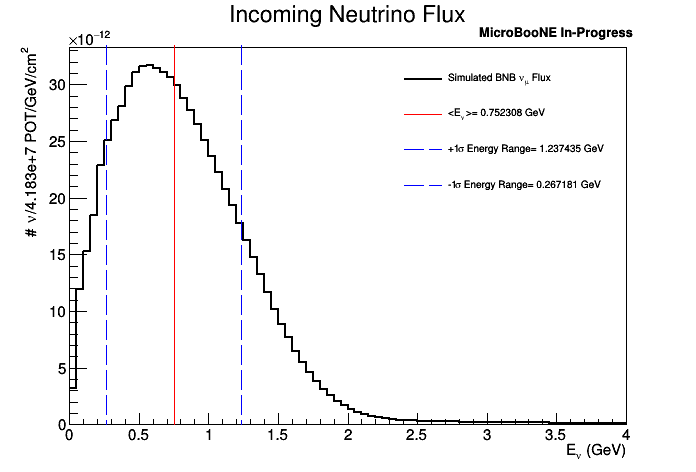

In [3]:
#We're going to calculate our Number of Targest and Neutrino Flux First
######################################################################
rho_Ar = 1.3836; #density of argon in g*cm^-3                                                                      
V = (256.35 - 20.0) * (233.0 - 20.0) * (1036.8 - 20.0);#volume of detector cm: x*y*z                               
N_A = 6.023e+23; #avogadro's number                                                                                
m_mol = 39.95; #mass of argon in g*mol^-1                                                                          
N_targets = (rho_Ar*V*N_A)/m_mol; #number of target nuclei                                                         
#print("Value of Volume: %E cm^3"%V)
print("Value of N_targets assuming 10cm FV border: %E N Targets"%N_targets)

#Neutrino flux stuff
flux_file = ROOT.TFile("../root_files/pelee/Run_all/neutrino_flux.root","READ")
canv_flux = ROOT.TCanvas("canv_flux","canv_flux",700,500)
h_flux = flux_file.Get("hEnumu_cv")
scale_factor= 1/(4997.*5e8)/(256.35*233);
h_flux.Scale(scale_factor)
h_flux.Draw("HIST")

h_flux.GetXaxis().SetRangeUser(0.0,4.0)
h_flux.GetXaxis().SetTitle("E_{#nu} (GeV)")
h_flux.GetYaxis().SetTitle("# #nu/4.183e+7 POT/GeV/cm^{2}")
h_flux.SetTitle("Incoming Neutrino Flux")
g = ROOT.TF1("g","gaus")
fit = h_flux.Fit(g,"Q")
parameters = g.GetParameters() 
ymax = 33.5E-12#h.GetMaximum()

mean = parameters[1]
mean_line = ROOT.TLine(mean,0,mean,ymax)
mean_line.Draw("SAME")
mean_line.SetLineColor(2)
mean_line.SetLineStyle(1)

sigma = parameters[2]
sigma_plus = mean+sigma
sigma_minus = mean-sigma

a_plus = ROOT.TLine(sigma_plus,0,sigma_plus,ymax)
a_plus.Draw("SAME")
a_plus.SetLineColor(4)
a_plus.SetLineStyle(9)

a_minus = ROOT.TLine(sigma_minus,0,sigma_minus,ymax)
a_minus.Draw("SAME")
a_minus.SetLineColor(4)
a_minus.SetLineStyle(9)

legend = ROOT.TLegend(0.57,0.57,0.87,0.87)
legend.AddEntry(h_flux,"Simulated BNB #nu_{#mu} Flux","L")
legend.AddEntry(mean_line,"<E_{#nu}>= %f GeV"%mean,"L")
legend.AddEntry(a_plus,"+1#sigma Energy Range= %f GeV"%sigma_plus,"L")
legend.AddEntry(a_minus,"-1#sigma Energy Range= %f GeV"%sigma_minus,"L")
legend.Draw("SAME")
legend.SetBorderSize(0)
t.DrawLatex(0.8,0.93,"%s"%sample_name)
canv_flux.Draw()

flux_value = (h_flux.Integral()) * pot_num
print("Neutrino Flux Estimate: %E v cm^2"%flux_value)

Now to Grab All the Histograms We Need

In [4]:
#########################################################################
#Here is where we grab the Efficiency Histograms and Smearing Matrices
#######################################################################
f_matrices = ROOT.TFile("../root_files/pelee/Run_all/xsec_extraction.root")

#individual particles quantities
#################################
var = ["_mom","_costheta","_phi"]
particles = ["_muon_all","_muon_contained","_muon_uncontained"]

#all muons
h_muon_all_eff = [] #list of eff for the particles
h_muon_all_matrices = [] #list of matrices for the particles
h_muon_all_num = [] #numerator of efficiency (for double checking)
h_muon_all_denom = [] #denominator of efficiency (for double checking)

for j in range(0,len(var)):
    h_muon_all_eff.append(f_matrices.Get("h_particle_num%s%s"%(particles[0],var[j])))
    h_muon_all_matrices.append(f_matrices.Get("h_particle_matrices%s%s"%(particles[0],var[j])))
print("Finished grabbing the all muon plots!")    

#contained muons
h_muon_contained_eff = [] #list of eff for the particles
h_muon_contained_matrices = [] #list of matrices for the particles
h_muon_contained_num = [] #numerator of efficiency (for double checking)
h_muon_contained_denom = [] #denominator of efficiency (for double checking)

for j in range(0,len(var)):
    h_muon_contained_eff.append(f_matrices.Get("h_particle_num%s%s"%(particles[1],var[j])))
    h_muon_contained_matrices.append(f_matrices.Get("h_particle_matrices%s%s"%(particles[1],var[j])))
print("Finished grabbing the contained muon plots!")

#uncontained muons
h_muon_uncontained_eff = [] #list of eff for the particles
h_muon_uncontained_matrices = [] #list of matrices for the particles
h_muon_uncontained_num = [] #numerator of efficiency (for double checking)
h_muon_uncontained_denom = [] #denominator of efficiency (for double checking)

for j in range(0,len(var)):
    h_muon_uncontained_eff.append(f_matrices.Get("h_particle_num%s%s"%(particles[2],var[j])))
    h_muon_uncontained_matrices.append(f_matrices.Get("h_particle_matrices%s%s"%(particles[2],var[j])))
print("Finished grabbing the uncontained muon plots!")

print('!!!Finished Grabbing all the Smearing Histograms!!!')

Finished grabbing the all muon plots!
Finished grabbing the contained muon plots!
Finished grabbing the uncontained muon plots!
!!!Finished Grabbing all the Smearing Histograms!!!


In [5]:
#Now we are going to grab all the histograms that will consistute the numerator of our XSec:
##########################################################################################

var0 = ["_mom","_theta","_phi"]
#BNB Histograms
f_bnb = ROOT.TFile('../root_files/pelee/Run_all/histograms_pelee_xsec_bnb.root')
h_bnb_muon_all = []
h_bnb_muon_contained = []
h_bnb_muon_uncontained = []

#EXT Histograms
f_ext = ROOT.TFile('../root_files/pelee/Run_all/histograms_pelee_xsec_ext.root')
h_ext_muon_all = []
h_ext_muon_contained = []
h_ext_muon_uncontained = []

#Dirt Histograms
f_dirt = ROOT.TFile('../root_files/pelee/Run_all/histograms_pelee_xsec_dirt_wgt.root')
h_dirt_muon_all = []
h_dirt_muon_contained = []
h_dirt_muon_uncontained = []

#NuWro Histograms
f_nuwro = ROOT.TFile('../root_files/nuwro/Run_all/histograms_nuwro_xsec_overlay_wgt.root')
h_nuwro_muon_all = []
h_nuwro_muon_contained = []
h_nuwro_muon_uncontained = []

#Overlay Histograms
#NOTE: How I define channels in all my code
#channel = ['_total', '_cc2p0pi','_ccNp1pi','_ccNp0pi','_cc1p0pi','_nc','_ccNpNpi',
#            '_cc0p0pi','_muon_all','_outfv','_ccnue']
f_overlay = ROOT.TFile('../root_files/pelee/Run_all/histograms_pelee_xsec_overlay_wgt.root')
channel = ['_total', '_cc2p0pi']
h_overlay_muon_all_total = []
h_overlay_muon_all_cc2p = []
h_overlay_muon_contained_total = []
h_overlay_muon_contained_cc2p = []
h_overlay_muon_uncontained_total = []
h_overlay_muon_uncontained_cc2p = []

#Efficiency
f_eff = ROOT.TFile('../root_files/pelee/Run_all/histograms_mc_eff.root')

#THE MEC and GCF HIstograms
f_empirical = ROOT.TFile("/Users/ssfehlberg/Research/Thesis/2Proton_Pandora/root_files/MEC/hists_empirical_lwellyn.root")
h_empirical_muon_all = []
f_nieves = ROOT.TFile("/Users/ssfehlberg/Research/Thesis/2Proton_Pandora/root_files/MEC/hists_nieves.root")  
h_nieves_muon_all = []
f_susa = ROOT.TFile("/Users/ssfehlberg/Research/Thesis/2Proton_Pandora/root_files/MEC/hists_susav2.root")
h_susa_muon_all = []
f_GCF = ROOT.TFile("/Users/ssfehlberg/Research/Thesis/2Proton_Pandora/root_files/GCF/hists_GCF_CCQE.root")
h_GCF_muon_all = []


#Now to Grab the histograms
##########################

#muon all
for j in range(0,len(var0)):
        
        #BNB
        hist_bnb = f_bnb.Get('h_muon%s_bnb'%(var0[j])) #bnb
        h_bnb_muon_all.append(hist_bnb)
        
        #EXT
        hist_ext = f_ext.Get('h_muon%s_ext'%(var0[j])) #ext
        h_ext_muon_all.append(hist_ext)
        
        #DIRT
        hist_dirt = f_dirt.Get('h_muon%s_dirt_wgt'%(var0[j])) #dirt
        h_dirt_muon_all.append(hist_dirt)
        
        #NuWro
        hist_nuwro = f_nuwro.Get('h_muon%s%s'%(var0[j],channel[1])) #total MC background
        h_nuwro_muon_all.append(hist_nuwro)
        
        #OVERLAY
        hist_overlay_total = f_overlay.Get('h_muon%s%s'%(var0[j],channel[0])) #total MC background
        h_overlay_muon_all_total.append(hist_overlay_total)
        hist_overlay_cc2p = f_overlay.Get('h_muon%s%s'%(var0[j],channel[1])) #cc2p signal
        h_overlay_muon_all_cc2p.append(hist_overlay_cc2p)  
        
        #EFFICIENCY
        h_num_muon = f_eff.Get('h_particle_num%s%s'%(particles[0],var[j]))
        h_muon_all_num.append(h_num_muon) 
        h_denom_muon = f_eff.Get('h_particle_denom%s%s'%(particles[0],var[j]))
        h_muon_all_denom.append(h_denom_muon)
        
        #EMPIRICAL
        h_empirical = f_empirical.Get("h_muon%s_lead_cut"%var0[j])
        h_empirical_muon_all.append(h_empirical)
    
        #NIEVES
        h_nieves = f_nieves.Get("h_muon%s_lead_cut"%var0[j])
        h_nieves_muon_all.append(h_nieves)
    
        #SUSA
        h_susa = f_susa.Get("h_muon%s_lead_cut"%var0[j])
        h_susa_muon_all.append(h_susa)
    
        #GCF
        h_GCF = f_GCF.Get("h_muon%s_lead_cut"%var0[j])
        h_GCF_muon_all.append(h_GCF)

             
print('Finished Grabbing the Muon All Histograms')

#muon contained
for j in range(0,len(var)):
        hist_bnb = f_bnb.Get('h%s%s_bnb'%(particles[1],var[j])) #bnb
        h_bnb_muon_contained.append(hist_bnb)
        hist_ext = f_ext.Get('h%s%s_ext'%(particles[1],var[j])) #ext
        h_ext_muon_contained.append(hist_ext)
        hist_dirt = f_dirt.Get('h%s%s_ext'%(particles[1],var[j])) #dirt
        h_dirt_muon_contained.append(hist_dirt)
        hist_overlay_total = f_overlay.Get('h%s%s%s'%(particles[1],var[j],channel[0])) #total MC background
        h_overlay_muon_contained_total.append(hist_overlay_total)
        hist_overlay_cc2p_muon_contained = f_overlay.Get('h%s%s%s'%(particles[1],var[j],channel[1])) #cc2p signal
        h_overlay_muon_contained_cc2p.append(hist_overlay_cc2p_muon_contained)   
        h_num_muon_contained = f_overlay.Get('h_particle_num%s%s'%(particles[1],var[j]))
        h_muon_contained_num.append(h_num_muon_contained) 
        h_denom_muon_contained = f_overlay.Get('h_particle_denom%s%s'%(particles[1],var[j]))
        h_muon_contained_denom.append(h_denom_muon_contained)
        
        
print('Finished Grabbing the Muon Contained Histograms')

#muon uncontained
for j in range(0,len(var)):
        hist_bnb = f_bnb.Get('h%s%s_bnb'%(particles[2],var[j])) #bnb
        h_bnb_muon_uncontained.append(hist_bnb)
        hist_ext = f_ext.Get('h%s%s_ext'%(particles[2],var[j])) #ext
        h_ext_muon_uncontained.append(hist_ext)
        hist_dirt = f_dirt.Get('h%s%s_ext'%(particles[2],var[j])) #dirt
        h_dirt_muon_uncontained.append(hist_dirt)
        hist_overlay_total = f_eff.Get('h%s%s%s'%(particles[2],var[j],channel[0])) #total MC background
        h_overlay_muon_uncontained_total.append(hist_overlay_total)
        hist_overlay_cc2p = f_eff.Get('h%s%s%s'%(particles[2],var[j],channel[1])) #cc2p signal
        h_overlay_muon_uncontained_cc2p.append(hist_overlay_cc2p)        
print('Finished Grabbing the Muon Uncontained Histograms')

print("!!!!!!!Finished Grabbing All the Histograms!!!!!!!!!")

Finished Grabbing the Muon All Histograms
Finished Grabbing the Muon Contained Histograms
Finished Grabbing the Muon Uncontained Histograms
!!!!!!!Finished Grabbing All the Histograms!!!!!!!!!


In [6]:
# Alright, let's extract a cross section. 
# Latex Format for XSEC Formula:
#    \sigma_i = 22 \frac{\sum_{j} U(N_j-b_j)}{\epsilon_i\Phi_i N_t}
# 
#  Or, more explicitly:
#
# 
# The CrossSection in Energy Bin i is calculated by:
# 1) Taking the Data Events selected in reco energy bin j
# 2) Subtracting away the background events in reco energy bin j.
# 3) Take the remaining events, and 'unfold' (U) them in order
# to undo the true->reco energy smearing, while summing up contributions
# from all reco energy bins j. This is entirely handled by RooUnfold
# 4) Next divide by the efficiency of selecting the signal event in 
# true energy bin i to get the number of signal events that occurred, 
# not just the ones we found.
# 5) Divide by the (NuMu Flux)*(POT)*(Neutrons in Target) to get 
# Cross Section Per Neutron
# 6) Multiply by 22 neutrons/argon to get Cross Section per Argon Nucleus
# 7) Celebrate!!!

Here is where we do the Closure Test

Now unfolding...
Iteration : 0
Chi^2 of change 17.3102
Calculating covariances due to number of measured events


Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfold.h
   requested to autoload type RooUnfoldResponse
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfold.h
   requested to autoload type RooUnfold
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfoldBayes.h
   requested to autoload type RooUnfoldBayes
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfoldBinByBin.h
   requested to autoload type RooUnfoldBinByBin
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfoldErrors.h
   requested to autoload type RooUnfoldErrors
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for src/RooUnfoldIds.h
   requested to autoload type RooUnfoldIds
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing Fil

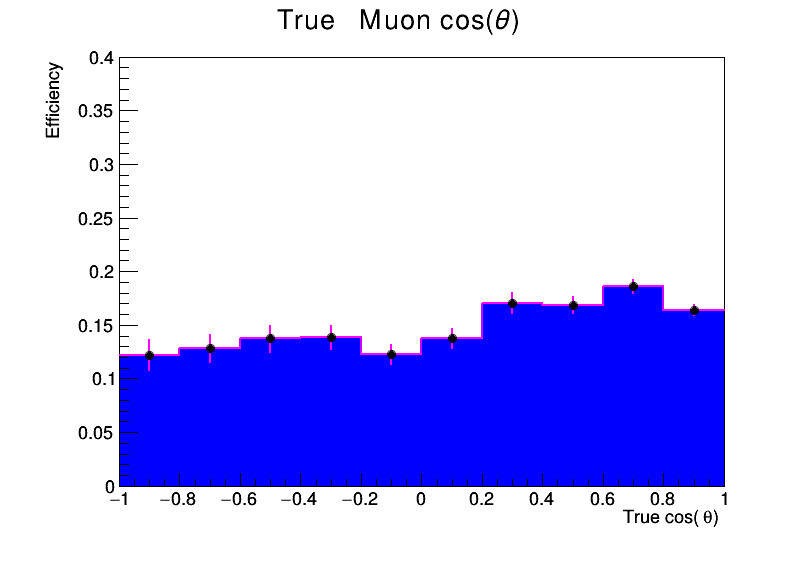

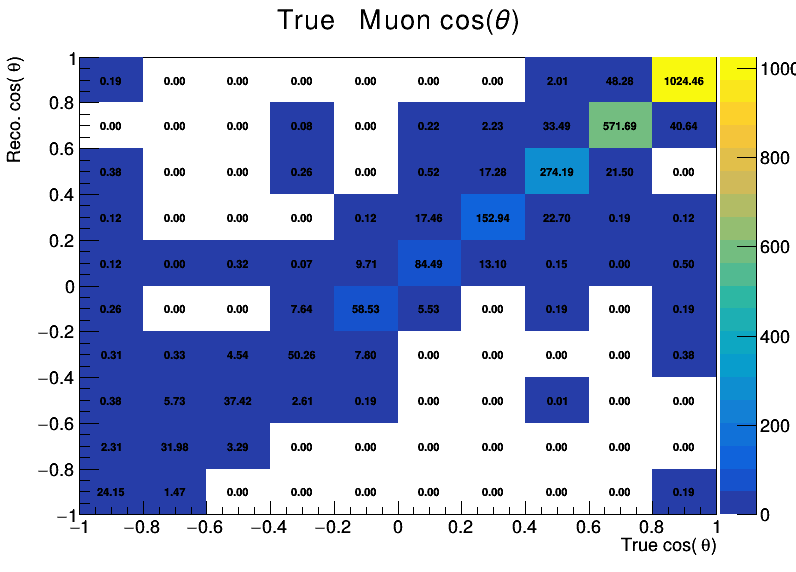

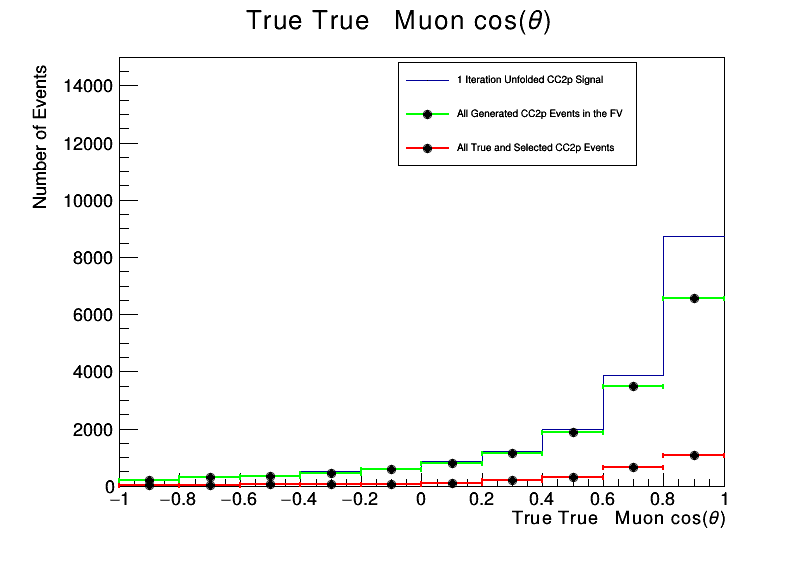

In [7]:
################################################################
#Here we do A Closure Test with The MC truth Acting As Our Data
###############################################################

#Some weird things:
#############################
plot =  1 #which variable to plot
muon_all_titles = [r'\mathrm{True}\ \text{Muon Momentum (GeV/c)}',r'\mathrm{True}\ \text{Muon cos}(\theta)',r'\mathrm{True}\ \text{Muon }\phi'] 
muon_all_max = [15000, 15000,6000] #muon max
iterations = [3,3,3]

#Check the Efficiency Histogram
###############################
c_eff = ROOT.TCanvas("c_eff","Efficiency",800,600)
c_eff.SetRightMargin(0.09)
c_eff.SetLeftMargin(0.15)
c_eff.SetBottomMargin(0.15)
#eff from xsec prep
h_muon_all_eff[plot].Draw("HIST") 
h_muon_all_eff[plot].SetFillColor(ROOT.kBlue)
h_muon_all_eff[plot].SetTitle(muon_all_titles[plot])
#h_muon_all_eff[plot].SetLineColor(ROOT.kBlue)
h_muon_all_eff[plot].SetMaximum(0.4)
#sanity check of xsec prep eff
h_num_eff = h_muon_all_num[plot].Clone() 
h_denom_eff = h_muon_all_denom[plot].Clone()
h_num_eff.Divide(h_num_eff,h_denom_eff,1,1,"cp")
h_num_eff.Draw("1p SAME")
h_num_eff.SetLineColor(ROOT.kMagenta)
c_eff.Draw()

#Make Sure the Smearing Matrix is Okay
######################################
c_2d =  ROOT.TCanvas("c_2d","Smearing Matrix",800,600) #you have to define a canvas to draw. 
#c_2d.SetRightMargin(0.09)
#c_2d.SetLeftMargin(0.15)
#c_2d.SetBottomMargin(0.15)
h_smearing = h_muon_all_matrices[plot].Clone()
h_smearing.Draw("colz text")
h_smearing.SetTitle(muon_all_titles[plot])
c_2d.Draw()

#Now to actually perform the closure test and plot it.
###############################################################
Closure_Response_Matrix = ROOT.RooUnfoldResponse(0,0,h_smearing,"ClosureResponseMatrix")
#ROOT.RooUnfoldResponse.UseOverflow(Closure_Response_Matrix,ROOT.kFALSE)
RooUnfoldBayes_MC = ROOT.RooUnfoldBayes(Closure_Response_Matrix,h_overlay_muon_all_cc2p[plot], 1)
error_method = 1
h_unfolded_signal_closure = RooUnfoldBayes_MC.Hreco(error_method)

#Now to plot everything:
#########################
c_closure = ROOT.TCanvas("c_closure","Closure Test",800,600)
c_closure.SetRightMargin(0.09)
c_closure.SetLeftMargin(0.15)
c_closure.SetBottomMargin(0.15)
h_closure = h_unfolded_signal_closure.Clone()
h_closure.Draw("hist")

#divide by efficiency
h_closure.Divide(h_unfolded_signal_closure,h_muon_all_eff[plot],1,1,"cp")
 
#Drawing Effieicny on Same Plot
h_muon_all_denom[plot].Draw("SAME 1e1p") 
h_muon_all_denom[plot].SetLineColor(ROOT.kGreen)
h_muon_all_num[plot].Draw("SAME 1e1p")
h_muon_all_num[plot].SetLineColor(ROOT.kRed)

#Stupid setting parameters
h_closure.SetMaximum(muon_all_max[plot])
h_closure.SetTitle(r'\text{True }%s'%muon_all_titles[plot])
h_closure.GetXaxis().SetTitle(r'\text{True }%s'%muon_all_titles[plot])
h_closure.GetYaxis().SetTitle("Number of Events")
legend_closure = ROOT.TLegend(0.5, 0.71, 0.799, 0.89)
legend_closure.AddEntry(h_closure,"1 Iteration Unfolded CC2p Signal","lpf")
legend_closure.AddEntry(h_muon_all_denom[plot],"All Generated CC2p Events in the FV","lpf")
legend_closure.AddEntry(h_muon_all_num[plot],"All True and Selected CC2p Events","lpf")
legend_closure.Draw()
c_closure.Draw()

In [8]:
print("---Bin Contents of Lower Bin For Muon All---")
print("Signal: %f"%h_overlay_muon_all_cc2p[plot].GetBinContent(0))
#print("Signal Bin Edge: %f"%h_overlay_muon_all\_cc2p[plot].GetBinLowEdge(1))
#print("Closure: %f"%h_closure.GetBinContent(0))
print("Numerator: %f"%h_muon_all_num[plot].GetBinContent(0))
print("Denominator: %f"%h_muon_all_denom[plot].GetBinContent(0))
print("Smearing: %f"%h_smearing.GetBinContent(0))

num_bins = h_overlay_muon_all_cc2p[plot].GetNbinsX() + 1
print("---Bin Contents of Upper Bin For Muon All---")
print("Signal: %f"%h_overlay_muon_all_cc2p[plot].GetBinContent(num_bins))
#print("Closure: %f"%h_closure.GetBinContent(num_bins))
print("Numerator: %f"%h_muon_all_num[plot].GetBinContent(num_bins))
print("Denominator: %f"%h_muon_all_denom[plot].GetBinContent(num_bins))
print("Smearing: %f"%h_smearing.GetBinContent(num_bins))

---Bin Contents of Lower Bin For Muon All---
Signal: 0.000000
Numerator: 0.000000
Denominator: 0.000000
Smearing: 0.000000
---Bin Contents of Upper Bin For Muon All---
Signal: 0.000000
Numerator: 0.000000
Denominator: 0.000000
Smearing: 0.000000


In [9]:
num_bins = h_overlay_muon_all_cc2p[plot].GetNbinsX()
print("Number of Bins: %f"%num_bins)
sum_particle = 0
sum_num = 0
for i in range (1, num_bins+1):
    bin_content_particle = h_overlay_muon_all_cc2p[plot].GetBinContent(i)
    sum_particle += bin_content_particle
    print("PARTICLE: Bin %s Content: %f"%(i,bin_content_particle))
    
    bin_content_num = h_muon_all_num[plot].GetBinContent(i)
    sum_num += bin_content_num
    print("NUM: Bin %s Content: %f"%(i,bin_content_num))
    
print("Sum Particle: %f"%sum_particle)
print("Sum Numerator: %f"%sum_num)
print("Difference: %f"%(sum_particle - sum_num))

print("MUON")
print("Integral: %f"%h_muon_all_num[plot].Integral())
print("# of Entries: %f"%h_muon_all_num[plot].GetEntries())

Number of Bins: 10.000000
PARTICLE: Bin 1 Content: 26.905745
NUM: Bin 1 Content: 25.814755
PARTICLE: Bin 2 Content: 40.440151
NUM: Bin 2 Content: 37.582024
PARTICLE: Bin 3 Content: 44.381128
NUM: Bin 3 Content: 46.344402
PARTICLE: Bin 4 Content: 67.819445
NUM: Bin 4 Content: 63.624237
PARTICLE: Bin 5 Content: 80.527426
NUM: Bin 5 Content: 72.332227
PARTICLE: Bin 6 Content: 117.385214
NUM: Bin 6 Content: 108.459293
PARTICLE: Bin 7 Content: 197.253867
NUM: Bin 7 Content: 193.668200
PARTICLE: Bin 8 Content: 352.570817
NUM: Bin 8 Content: 314.129440
PARTICLE: Bin 9 Content: 703.239488
NUM: Bin 9 Content: 648.354164
PARTICLE: Bin 10 Content: 1432.784368
NUM: Bin 10 Content: 1074.941896
Sum Particle: 3063.307650
Sum Numerator: 2585.250637
Difference: 478.057012
MUON
Integral: 2585.250637
# of Entries: 8595.000000


This is where we perform our Iteration Test Using the NuFACT Data as Fake Data

Num entries in h_ext: 105.17099999999998
Num entries in h_dirt: 11.723508300454244
Num entries in h_ext After Adding Dirt: 116.89450830045422
Number of Entries in h_overlay: 4485.926403325734
Number of Entries in h_overlay_cc2p: 3063.3076496808467
Num entries in h_overlay after Subtraction: 1422.6187536448874
Num entries in h_ext after everything: 1539.5132619453416
Num entries in h_bnb: 4112.0
Num entries in h_bnb After Subtraction: 2572.4867380546584


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6


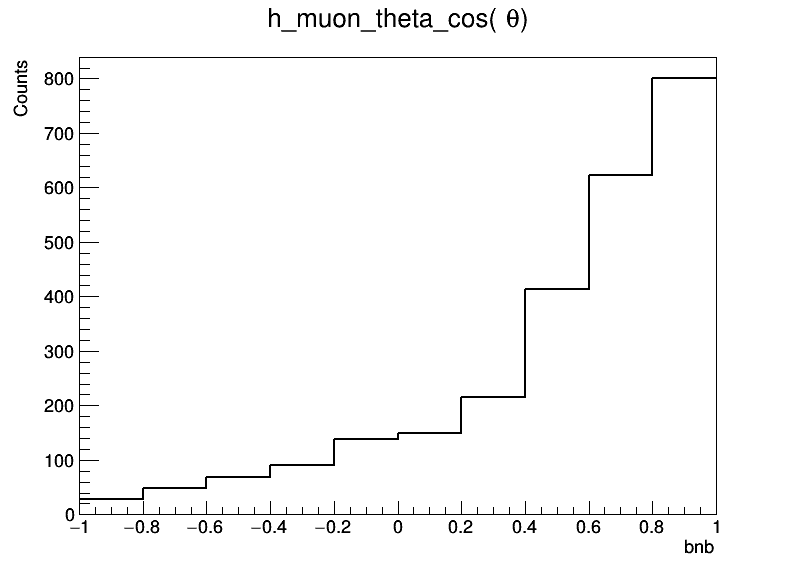

In [10]:
#General Stuff we Need for plotting
#####################################
colors = [ROOT.kBlue,ROOT.kRed, ROOT.kGreen, 
          ROOT.kCyan, ROOT.kBlack, ROOT.kOrange, 
          ROOT.kYellow, ROOT.kAzure,ROOT.kSpring] #colors for the iteration test

#Defining histograms for later
###############################
h_eff = h_muon_all_eff[plot].Clone() #efficiency 
h_smearing = h_muon_all_matrices[plot].Clone() #smearing matrix
h_denom = h_muon_all_denom[plot].Clone()#what we will compare to

#Defining stuff for the unfolding
#################################
Response_Matrix = ROOT.RooUnfoldResponse(0,0,h_smearing) #the response matrix
error_method = 2 #error method to use: 2 is kcovariance error propogation, 1 is binbybin error, and 0 is no error

#Creating the Background: add the backgrounds together: h_ext is what we will subtract
########################################################################################
c_background = ROOT.TCanvas("c6","Total Background",800,600) #you have to define a canvas to draw.
h_ext = h_ext_muon_all[plot].Clone() #ext background
print("Num entries in h_ext: %s"%h_ext.Integral())
h_dirt = h_dirt_muon_all[plot].Clone() #dirt background
print("Num entries in h_dirt: %s"%h_dirt.Integral())
h_ext.Add(h_dirt)
print("Num entries in h_ext After Adding Dirt: %s"%h_ext.Integral())
h_overlay_total2 = h_overlay_muon_all_total[plot].Clone() #overlay background
print("Number of Entries in h_overlay: %s"%h_overlay_total2.Integral())
h_overlay_cc2p = h_overlay_muon_all_cc2p[plot].Clone()
print("Number of Entries in h_overlay_cc2p: %s"%h_overlay_cc2p.Integral())
h_overlay_total2.Add(h_overlay_cc2p, -1) # make sure to taake the cc2p out of the total
print("Num entries in h_overlay after Subtraction: %s"%h_overlay_total2.Integral())
h_ext.Add(h_overlay_total2)
print("Num entries in h_ext after everything: %s"%h_ext.Integral())
h_ext.Draw("HIST")
c_background.Draw()

#Draw the subtracted backgrounds as a check
c6 = ROOT.TCanvas("c6","BNB with Background Subtracted",800,600) #you have to define a canvas to draw.
h_bnb = h_bnb_muon_all[plot].Clone()
print("Num entries in h_bnb: %s"%h_bnb.Integral())
h_bnb.Add(h_ext,-1)
print("Num entries in h_bnb After Subtraction: %s"%h_bnb.Integral())
h_bnb.Draw("HIST")
c6.Draw()

STARTING THE ITERATION TEST
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Iteration : 1
Chi^2 of change 0.154919
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Iteration : 1
Chi^2 of change 0.154919
Iteration : 2
Chi^2 of change 0.0328958
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Iteration : 1
Chi^2 of change 0.154919
Iteration : 2
Chi^2 of change 0.0328958
Iteration : 3
Chi^2 of change 0.0104949
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Iteration : 1
Chi^2 of change 0.154919
Iteration : 2
Chi^2 of change 0.0328958
Iteration : 3
Chi^2 of change 0.0104949
Iteration : 4
Chi^2 of change 0.0035995
Calculating covariances due to number of measured events
Now unfolding...

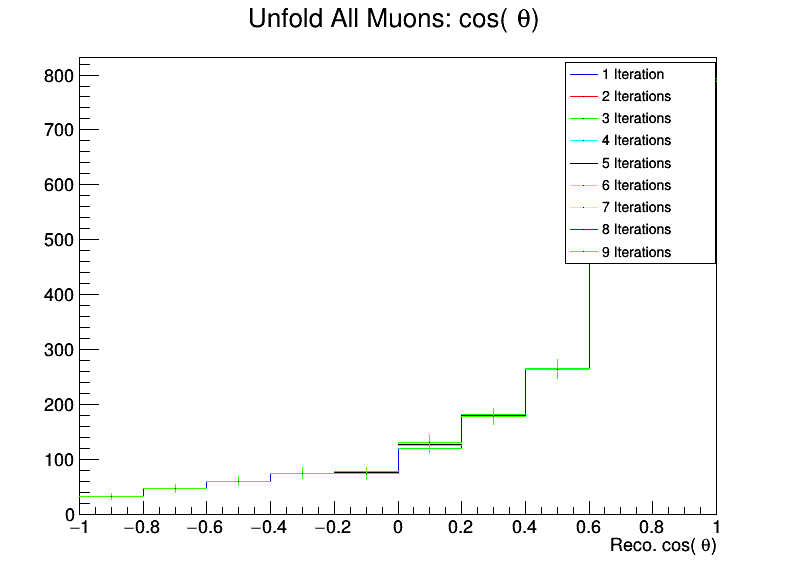

In [11]:
#Time to Perform an Iteration Test
################################
print("STARTING THE ITERATION TEST")
iterations_test = 8 #number of iterations
h_nuwro = h_nuwro_muon_all[plot].Clone()

RooUnfoldBayes_Test = ROOT.RooUnfoldBayes(Response_Matrix, h_nuwro, iterations_test);

RooUnfoldBayes_Data = []
RooUnfoldBayes_Data.append(ROOT.RooUnfoldBayes(Response_Matrix, h_nuwro,1));

h_unfolded_signal_test = []
h_unfolded_signal_test.append(RooUnfoldBayes_Data[0].Hreco(error_method))

h_xsec_test = []
c_xsec_test = ROOT.TCanvas("c_xsec_test","iteration 1",800,600)
h_xsec_test.append(h_unfolded_signal_test[0].Clone())
h_xsec_test[0].Draw("HIST")
h_xsec_test[0].SetLineColor(colors[0])
#h_xsec_test[0].SetMaximum(other_max[plot])
legend_test = ROOT.TLegend(0.71, 0.54, 0.899, 0.89)
legend_test.AddEntry(h_xsec_test[0],"1 Iteration","lpf")

for i in range(1,iterations_test+1):
    RooUnfoldBayes_Data.append(ROOT.RooUnfoldBayes(Response_Matrix, h_nuwro, i+1));
    h_unfolded_signal_test.append(RooUnfoldBayes_Data[i-1].Hreco(error_method)) # the unfolded data
    h_unfolded_signal_test[i-1].Draw("SAME")
    h_unfolded_signal_test[i-1].SetLineColor(colors[i])
    legend_test.AddEntry(h_unfolded_signal_test[i-1],"%s Iterations "%(i+1),"lpf")
    
legend_test.Draw("SAME")
c_xsec_test.Draw()    

In [12]:
#This is for our chi2 test
#############################
iterations_test = 3
chi2_vector = []
h_truth = h_muon_all_denom[plot].Clone()
n_bins = h_truth.GetNbinsX()
iterations_vector = [] #number of iterations as a function of number of plots
values_vector = [] #values of the delta chi2

for x in range(1,iterations_test+1):
    
    unfolded_observed = ROOT.RooUnfoldBayes(Closure_Response_Matrix,h_nuwro, x)
    h_observed = unfolded_observed.Hreco(error_method)
    
    chi2 = 0.0
    for i in range(1,n_bins+1):
        O_i = h_observed.GetBinContent(i)
        E_i = h_truth.GetBinContent(i)    

        if(O_i == 0 and E_i == 0):
            chi2 += 0.0
        elif(E_i == 0):
            chi2 += 0.0
        else:
            chi2 += np.square(O_i - E_i)/E_i
    
    print("-----------------------------------")
    print("Number of Iterations: %f"%(x))
    print("Number of Bins: %f"%n_bins)
    print("Chi2 of the Difference: %f"%chi2)
    print("Chi2/D.o.F.%f"%(chi2/n_bins))
    print("----------------------------------- \n")
    chi2_vector.append(chi2/n_bins)
    
for i in range(0,len(chi2_vector)-1):
    delta_chi2 = chi2_vector[i+1] - chi2_vector[i]
    print("////////////")
    print("Delta Chi2 between %f and %f iterations: %f"%((i+2),(i+1),delta_chi2))
    print("//////////// \n")
    
    if(delta_chi2 < 1.0):
        iterations_vector.append(i+1)
        values_vector.append(delta_chi2)

#sort based on delta_chi2        
Z = [iterations_vector for _,iterations_vector in sorted(zip(values_vector,iterations_vector))]

print("--------")
print("Smallest Number of Iterations Needed: %s"%Z[0])
print("--------\n")  

-----------------------------------
Number of Iterations: 1.000000
Number of Bins: 10.000000
Chi2 of the Difference: 11676.375844
Chi2/D.o.F.1167.637584
----------------------------------- 

-----------------------------------
Number of Iterations: 2.000000
Number of Bins: 10.000000
Chi2 of the Difference: 11676.844221
Chi2/D.o.F.1167.684422
----------------------------------- 

-----------------------------------
Number of Iterations: 3.000000
Number of Bins: 10.000000
Chi2 of the Difference: 11676.951762
Chi2/D.o.F.1167.695176
----------------------------------- 

////////////
Delta Chi2 between 2.000000 and 1.000000 iterations: 0.046838
//////////// 

////////////
Delta Chi2 between 3.000000 and 2.000000 iterations: 0.010754
//////////// 

--------
Smallest Number of Iterations Needed: 2
--------

Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 29.9641
Iteration : 1
Chi^2 o

Before we can draw everything, we have to create the MEC and GCF plots to plot on the BNB plot

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv_theory


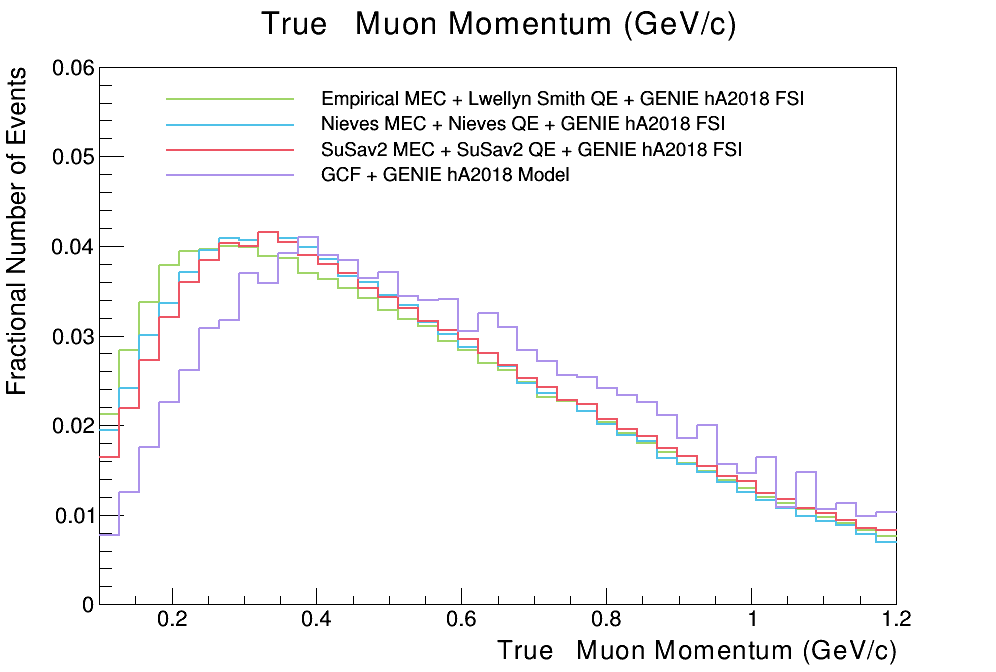

In [22]:
#Drawing all the theory models on the same plot
####################################

plot = 0
max = [0.06,0.25,0.2]
flip_legend = [False,False,False]

h_empirical = h_empirical_muon_all[plot].Clone()
h_nieves = h_nieves_muon_all[plot].Clone()
h_susa = h_susa_muon_all[plot].Clone()
h_GCF = h_GCF_muon_all[plot].Clone()
h_GCF.Scale(N_targets*flux_value)

#time to area normalize
n_bins = h_empirical.GetNbinsX()
empirical_integral = h_empirical.Integral()
nieves_integral = h_nieves.Integral()
susa_integral = h_susa.Integral()
GCF_integral = h_GCF.Integral()

for i in range(1,n_bins+1):
    empirical_bin_content = h_empirical.GetBinContent(i)
    empirical_value = empirical_bin_content/empirical_integral
    h_empirical.SetBinContent(i,empirical_value)
    
    
    nieves_bin_content = h_nieves.GetBinContent(i)
    nieves_value = nieves_bin_content/nieves_integral
    h_nieves.SetBinContent(i,nieves_value)
    
    susa_bin_content = h_susa.GetBinContent(i)
    susa_value = susa_bin_content/susa_integral
    h_susa.SetBinContent(i,susa_value)
    
    GCF_bin_content = h_GCF.GetBinContent(i)
    GCF_value = GCF_bin_content/GCF_integral
    h_GCF.SetBinContent(i,GCF_value)
                   
#Now to do the actual drawing
##################
color0 = ROOT.kBlack
color1 = ROOT.TColor.GetColor("#FFCE54") #yellow
color2 = ROOT.TColor.GetColor("#A0D568") #green
color3 = ROOT.TColor.GetColor("#4FC1E8") #blue
color4 = ROOT.TColor.GetColor("#ED5564") #red
color5 = ROOT.TColor.GetColor("#AC92EB") #purple

canv_theory = ROOT.TCanvas("canv_theory","canv_theory",1000,700)

h_empirical.Draw("hist")
h_empirical.SetLineColor(color2)
h_empirical.SetTitle("%s"%muon_all_titles[plot])
h_empirical.SetXTitle("%s"%muon_all_titles[plot])
h_empirical.GetXaxis().SetTitleSize(28)
h_empirical.GetXaxis().SetTitleFont(43)
h_empirical.SetYTitle("Fractional Number of Events")
h_empirical.GetYaxis().SetTitleSize(28)
h_empirical.GetYaxis().SetTitleFont(43)
h_empirical.SetMaximum(max[plot])

h_nieves.Draw("hist same")
h_nieves.SetLineColor(color3)

h_susa.Draw("hist same")
h_susa.SetLineColor(color4)

h_GCF.Draw("hist same")
h_GCF.SetLineColor(color5)

'''
if(flip_legend[plot]):
    legend_theory = ROOT.TLegend(0.29, 0.54, 0.29, 0.89)
else:
    legend_theory = ROOT.TLegend(0.54, 0.54, 0.89, 0.89)

legend_theory.AddEntry(h_empirical,"#splitline{Empirical MEC + Lwellyn Smith QE}{with FSI (GENIE hA2018 Model)}","L")
legend_theory.AddEntry(h_nieves,"#splitline{Nieves MEC & QE with FSI}{(GENIE hA2018 Model)}","L")
legend_theory.AddEntry(h_susa,"#splitline{SuSav2 MEC + QE with FSI}{(GENIE hA2018 Model)}","L")
legend_theory.AddEntry(h_GCF,"#splitline{GCF with FSI}{(GENIE hA2018 Model)}","L") 
legend_theory.SetLineWidth(0);
legend_theory.SetFillColor(ROOT.kWhite);
legend_theory.SetTextSize(0.03);
legend_theory.Draw("SAME")
'''

legend_theory = ROOT.TLegend(0.14, 0.72, 0.87, 0.87)
#legend_theory.SetNColumns(2)
#legend_theory.AddEntry(h_empirical,"#splitline{Empirical MEC + Lwellyn Smith QE}{with FSI (GENIE hA2018 Model)}","L")
#legend_theory.AddEntry(h_nieves,"#splitline{Nieves MEC & QE with FSI}{(GENIE hA2018 Model)}","L")
#legend_theory.AddEntry(h_susa,"#splitline{SuSav2 MEC & QE with FSI}{(GENIE hA2018 Model)}","L")
#legend_theory.AddEntry(h_GCF,"#splitline{GCF with FSI}{(GENIE hA2018 Model)}","L") 

legend_theory.AddEntry(h_empirical,"Empirical MEC + Lwellyn Smith QE + GENIE hA2018 FSI","L")
legend_theory.AddEntry(h_nieves,"Nieves MEC + Nieves QE + GENIE hA2018 FSI","L")
legend_theory.AddEntry(h_susa,"SuSav2 MEC + SuSav2 QE + GENIE hA2018 FSI","L")
legend_theory.AddEntry(h_GCF,"GCF + GENIE hA2018 Model","L") 
legend_theory.SetLineWidth(0);
legend_theory.SetFillColor(ROOT.kWhite);
legend_theory.SetTextSize(0.03);
legend_theory.Draw("SAME")


canv_theory.Draw()

In [14]:
#Before we can plot the MEC models on the same plot as the BNB, we have to "normalize" using the procedure outlined
# in section 7.4 of this document: https://arxiv.org/pdf/2101.11867.pdf
# We are specifically refering to equations 98: MC Estimate of the XSec and 99: The SD of this calculation
# (98) dsigma/dx = <sigma> * n/ (N* deltax) 
#where deltax is bin width, n is # of events in a bin, N is total # of events, and sigma is the flux weighted xsec
#(99) SD(dsigma/dx) = <sigma>/(deltax * N) * (((N-n)n)/N)^(1/2)

#here are the sigmas. Taken from the GENIE splines

#stevens values
sigma_empirical = 3.02249 * 1E-37
sigma_nieves = 2.70266 * 1E-37

#me values
#sigma_nieves = 2.71682 * 1E-37 
sigma_susa = 3.81417 * 1E-37

#N is the total number of events generated in each MEC type
N_empirical = 4000000
N_nieves = 2400000
N_susa = 3800000
N_GCF = 500000

#Here is were we calculate the dsigma/dx and the SD of dsigma/dx
n_bins = h_empirical_muon_all[plot].GetNbinsX()
for i in range(1,n_bins+1):
    
    delta_x = h_empirical_muon_all[plot].GetBinWidth(i)
    print("Width of Bin: %f"%delta_x)
    
    #empirical
    n_empirical = h_empirical_muon_all[plot].GetBinContent(i) * N_empirical
    value_empirical = (sigma_empirical * n_empirical)/( N_empirical * delta_x)
    SD_empirical = (sigma_empirical)/(delta_x*N_empirical) * np.sqrt(((N_empirical - n_empirical)*n_empirical)/(N_empirical))
    h_empirical_muon_all[plot].SetBinContent(i,value_empirical)
    h_empirical_muon_all[plot].SetBinError(i,SD_empirical)
    
    #nieves
    n_nieves = h_nieves_muon_all[plot].GetBinContent(i)
    value_nieves = (sigma_nieves * n_nieves)/(N_nieves * delta_x)
    SD_nieves = (sigma_nieves)/(delta_x*N_nieves) * np.sqrt(((N_nieves - n_nieves)*n_nieves)/(N_nieves))
    h_nieves_muon_all[plot].SetBinContent(i,value_nieves)
    h_nieves_muon_all[plot].SetBinError(i,SD_nieves)
    
    print("n_nieves: %s"%n_nieves)
    print(sigma_nieves*n_nieves)
    print(N_nieves * delta_x)
    print("Value_nieves: %s"%value_nieves)
    
    #susa
    n_susa = h_susa_muon_all[plot].GetBinContent(i)
    value_susa = (sigma_susa * n_susa)/(N_susa * delta_x)
    SD_susa = (sigma_susa)/(delta_x*N_susa) * np.sqrt(((N_susa - n_susa)*n_susa)/(N_susa))
    h_susa_muon_all[plot].SetBinContent(i,value_susa)
    h_susa_muon_all[plot].SetBinError(i,SD_susa)
                                                                           
    #Dealing with the GCF is a bit trickier
    #Each event in the GCF is assigned a weight which modifies the CCQE differential cross section
    #While we hav
    n_GCF = h_GCF_muon_all[plot].GetBinContent(i) 
    value_GCF = (n_GCF)/(N_GCF*delta_x)
    SD_GCF = (1)/(delta_x*N_GCF) * np.sqrt(((N_GCF - n_GCF)*n_GCF)/(N_GCF))
    h_GCF_muon_all[plot].SetBinContent(i,value_GCF)
    h_GCF_muon_all[plot].SetBinError(i,SD_GCF)
    
    print("n_GCF: %g"%n_GCF)
    print("Value_GCF: %g"%value_GCF)

Width of Bin: 0.630000
n_nieves: 29480.0
7.96744168e-33
1512000.0
Value_nieves: 5.2694720105820105e-39
n_GCF: 5.12016e-36
Value_GCF: 1.62545e-41
Width of Bin: 0.630000
n_nieves: 29605.0
8.00122493e-33
1512000.0
Value_nieves: 5.29181542989418e-39
n_GCF: 5.31337e-36
Value_GCF: 1.68678e-41
Width of Bin: 0.630000
n_nieves: 29343.0
7.930415238000001e-33
1512000.0
Value_nieves: 5.244983623015874e-39
n_GCF: 5.40844e-36
Value_GCF: 1.71696e-41
Width of Bin: 0.630000
n_nieves: 29361.0
7.935280026e-33
1512000.0
Value_nieves: 5.248201075396826e-39
n_GCF: 5.04301e-36
Value_GCF: 1.60096e-41
Width of Bin: 0.630000
n_nieves: 29715.0
8.03095419e-33
1512000.0
Value_nieves: 5.3114776388888895e-39
n_GCF: 5.05412e-36
Value_GCF: 1.60448e-41
Width of Bin: 0.630000
n_nieves: 29606.0
8.001495196e-33
1512000.0
Value_nieves: 5.291994177248677e-39
n_GCF: 4.95823e-36
Value_GCF: 1.57404e-41
Width of Bin: 0.630000
n_nieves: 29788.0
8.050683608000001e-33
1512000.0
Value_nieves: 5.324526195767196e-39
n_GCF: 5.21492e-3

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


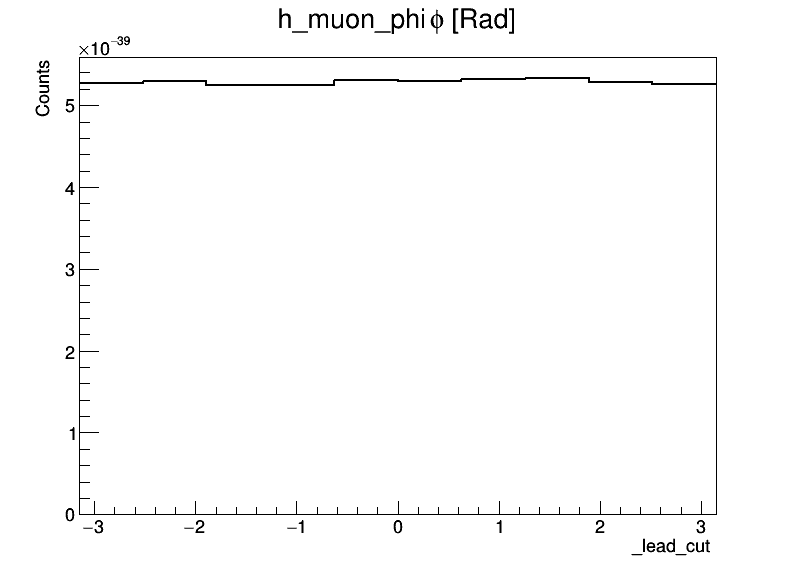

In [15]:
canv_test = ROOT.TCanvas("canv_test","Unfolded Data ONLY",800,600)
h_nieves_muon_all[plot].Draw("hist")
canv_test.Draw()

NOW TO PERFORM THE UNFOLDING

BEGINING THE UNFOLDING FOR THE BNB
Number of Iterations: 2
FINISHED THE UNFOLDING
Number of Bins: 10.000000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Bin Content: 0.000000
Bin Width: 0.200000
Now unfolding...
Iteration : 0
Chi^2 of change 77.2593
Iteration : 1
Chi^2 of change 0.905074
Calculating covariances due to number of measured events


Warning in <TH1D::Divide>: Dividing histograms with different axis limits
Warning in <TH1D::Divide>: Dividing histograms with different axis limits


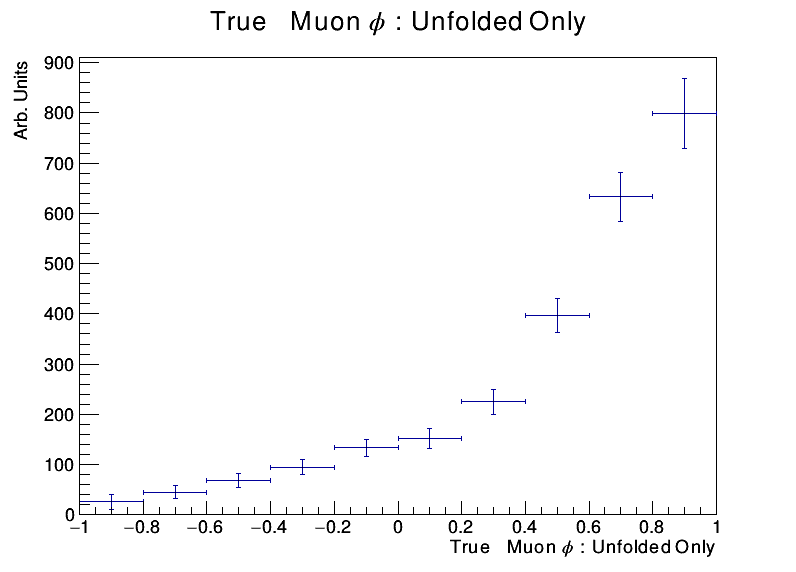

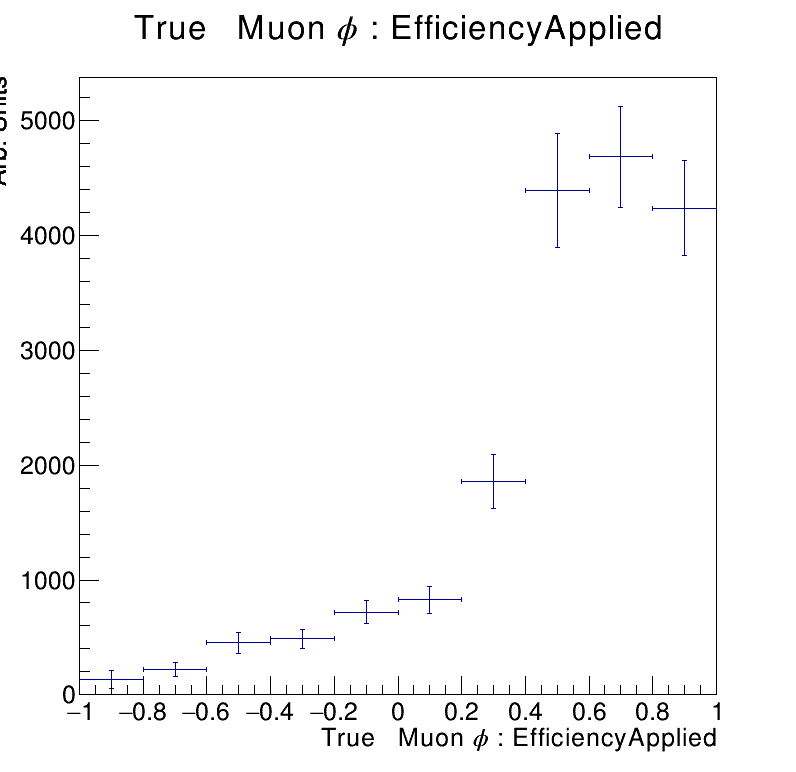

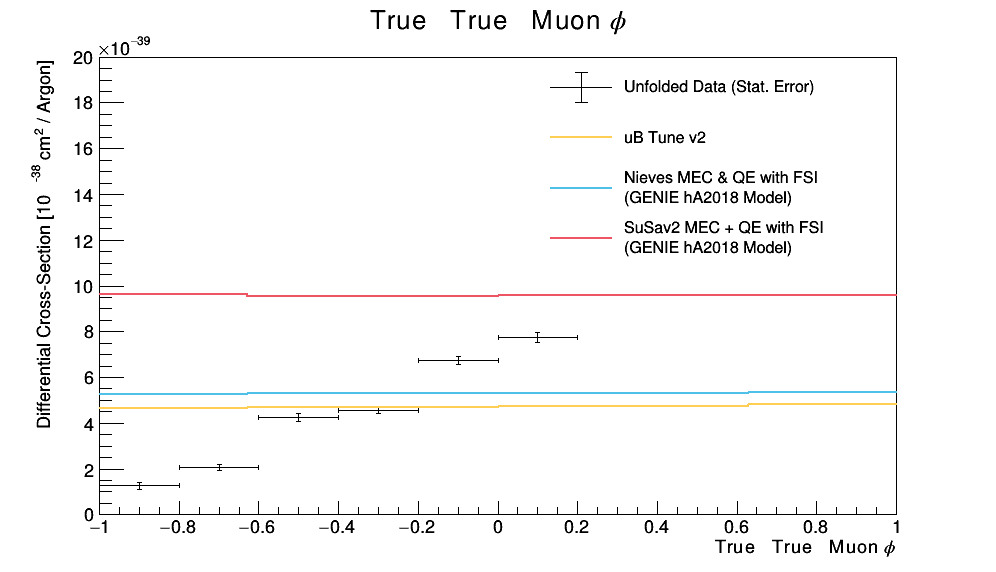

In [16]:
####################################
#Now For the Real Thing!
###########################################
# Brief note: This tutorial uses Bayes/D'Agostini as the method of unfolding. RooUnfold features 
# two muon_all methods of unfolding that can easily be substituted in: BinByBin Unfolding, and 
# Singular Value Decomposition (SVD) Unfolding:
# kterm = 4
# RooUnfoldSVD_Data = ROOT.RooUnfoldSvd(Response_Matrix, Data_Minus_Background_h, kterm);
print("BEGINING THE UNFOLDING FOR THE BNB")
iterations = Z[0] # number of times to run the bayes unfolding
print("Number of Iterations: %s"%iterations)
RooUnfoldBayes_Data = ROOT.RooUnfoldBayes(Response_Matrix, h_bnb, iterations);
h_unfolded_signal =RooUnfoldBayes_Data.Hreco(error_method)
print("FINISHED THE UNFOLDING")

#######################
#Now To Draw Everything
###########################
muon_all_xsec_max = [60E-39,20E-38,2E-38]
color0 = ROOT.kBlack
color1 = ROOT.TColor.GetColor("#FFCE54") #yellow
color2 = ROOT.TColor.GetColor("#A0D568") #green
color3 = ROOT.TColor.GetColor("#4FC1E8") #blue
color4 = ROOT.TColor.GetColor("#ED5564") #red
color5 = ROOT.TColor.GetColor("#AC92EB") #purple

#Defining histograms for later
h_eff = h_muon_all_eff[plot].Clone() #efficiency 
h_smearing = h_muon_all_matrices[plot].Clone() #smearing matrix
h_denom = h_muon_all_denom[plot].Clone()#what we will compare to

#Draw one without the constants applied
#######################################
c_xsec_no_const = ROOT.TCanvas("c_xsec_no_const","Unfolded Data ONLY",800,600)
h_xsec_no_const = h_unfolded_signal.Clone();
h_xsec_no_const.SetTitle("%s: \mathrm{Unfolded} \, \mathrm{Only}"%muon_all_titles[plot])
h_xsec_no_const.SetXTitle("%s: \mathrm{Unfolded} \, \mathrm{Only}"%muon_all_titles[plot])
h_xsec_no_const.SetYTitle("Arb. Units")
h_xsec_no_const.Draw("1e1p")
c_xsec_no_const.Draw()

#one with the efficiency applied
##################################
c_xsec_eff = ROOT.TCanvas("c_xsec_eff","Unfolded Data w/ Efficiency",800,800)
h_xsec_eff = h_unfolded_signal.Clone();
h_xsec_eff.Divide(h_unfolded_signal,h_eff,1,1,"cp")
h_xsec_eff.SetTitle("%s: \mathrm{Efficiency Applied}"%muon_all_titles[plot])
h_xsec_eff.SetXTitle("%s: \mathrm{Efficiency Applied}"%muon_all_titles[plot])
h_xsec_eff.SetYTitle("Arb. Units")
h_xsec_eff.Draw("1e1p")
c_xsec_eff.Draw() 

#One with everything applied
############################
c_xsec = ROOT.TCanvas("c_xsec","Unfolded Data w Everything",1000,600)
h_xsec = h_unfolded_signal.Clone();
h_xsec.SetLineColor(color0)
h_xsec.SetTitle("\mathrm{True}\ %s"%muon_all_titles[plot])
h_xsec.SetXTitle("\mathrm{True}\ %s"%muon_all_titles[plot])
h_xsec.SetYTitle("Differential Cross-Section [10^{-38} cm^{2} / Argon]")
h_xsec.Draw("1e1p")

#drawing denom on the same plot
h_denom.Draw("HIST SAME") 
h_denom.SetLineColor(color1)

#divide BNB by efficiency
h_xsec.Divide(h_unfolded_signal,h_eff,1,1,"cp")
 
#scale Both MC and BNB by flux and number of targets
scale_value = 1/(N_targets*flux_value)
h_xsec.Scale(scale_value) 
h_denom.Scale(scale_value)

#divide by the bin width

num_bins = h_xsec.GetNbinsX()
print("Number of Bins: %f"%num_bins)
for i in range(1,num_bins+1):
   
    #BNB
    bin_content = h_xsec.GetBinContent(i)
    print("Bin Content: %f"%bin_content)
    bin_width = h_xsec.GetBinWidth(i)
    print("Bin Width: %f"%bin_width)
    value = bin_content/bin_width
    h_xsec.SetBinContent(i,value)

    #MC
    bin_content_true = h_denom.GetBinContent(i)
    bin_width_true = h_denom.GetBinWidth(i)
    value_true = bin_content_true/bin_width_true
    h_denom.SetBinContent(i,value_true)

#drawing the different models on the same plot
#h_empirical_muon_all[plot].Draw("hist same")
#h_empirical_muon_all[plot].SetLineColor(color2)

h_nieves_muon_all[plot].Draw("hist same")
h_nieves_muon_all[plot].SetLineColor(color3)

h_susa_muon_all[plot].Draw("hist same")
h_susa_muon_all[plot].SetLineColor(color4)

#h_GCF_muon_all[plot].Draw("hist same")
#h_GCF_muon_all[plot].SetLineColor(color5)

#legend stuff
h_xsec.SetMaximum(muon_all_xsec_max[plot])
legend_xsec = ROOT.TLegend(0.54, 0.54, 0.89, 0.89)
legend_xsec.AddEntry(h_xsec,"Unfolded Data (Stat. Error)","lepf")
legend_xsec.AddEntry(h_denom,"uB Tune v2","L")
#legend_xsec.AddEntry(h_empirical_muon_all[plot],"#splitline{Empirical MEC + Lwellyn Smith QE}{with FSI (GENIE hA2018 Model)}","L")
legend_xsec.AddEntry(h_nieves_muon_all[plot],"#splitline{Nieves MEC & QE with FSI}{(GENIE hA2018 Model)}","L")
legend_xsec.AddEntry(h_susa_muon_all[plot],"#splitline{SuSav2 MEC + QE with FSI}{(GENIE hA2018 Model)}","L")
#legend_xsec.AddEntry(h_GCF_muon_all[plot],"#splitline{GCF with FSI}{(GENIE hA2018 Model)}","L") 
legend_xsec.SetLineWidth(0);
legend_xsec.SetFillColor(ROOT.kWhite);
legend_xsec.SetTextSize(0.03);
legend_xsec.Draw("SAME")
c_xsec.Draw()